In [15]:
# Cell 1: Load Data & Initial Setup for FEMA HMA EDA

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Inline plots for notebook
%matplotlib inline

plt.style.use('default')
sns.set_palette("husl")

# Load cleaned dataset (adjust path if needed)
data_folder = r"C:\Repos\capstone-project-anjana\data"
file_path = f"{data_folder}/hma_mitigated_properties_cleaned.csv"
df = pd.read_csv(file_path)

# Quick Overview
print("=== Dataset Loaded Successfully ===")


=== Dataset Loaded Successfully ===


In [16]:
print(f"Shape: {df.shape} rows/columns")
print(f"Columns: {df.columns.tolist()}")
print("\nData Types:")
print(df.dtypes)
print("\nBasic Summary (Numeric Columns):")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print(f"\nTotal Investment: ${df['totalMitigationCost'].sum():,.0f}")
print(f"Avg Project Cost: ${df['actualAmountPaid'].mean():,.0f}")

Shape: (42038, 10) rows/columns
Columns: ['state', 'county', 'damageCategory', 'structureType', 'actualAmountPaid', 'numberOfProperties', 'propertyPartOfProject', 'programFy', 'date_approved_proxy', 'totalMitigationCost']

Data Types:
state                     object
county                    object
damageCategory            object
structureType             object
actualAmountPaid         float64
numberOfProperties         int64
propertyPartOfProject     object
programFy                  int64
date_approved_proxy       object
totalMitigationCost      float64
dtype: object

Basic Summary (Numeric Columns):
       actualAmountPaid  numberOfProperties     programFy  totalMitigationCost
count      4.203800e+04        42038.000000  42038.000000         4.203800e+04
mean       2.794171e+05            1.583948   2006.729602         2.976425e+05
std        1.046224e+07            6.552783      4.822677         1.089931e+07
min       -2.027900e+04            1.000000   1996.000000        -2.027

In [17]:
# Preview first 5 rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
           state       county damageCategory  structureType  actualAmountPaid  \
0      Wisconsin  Trempealeau       50 - 99%  Single Family          105000.0   
1  West Virginia      Wyoming        Unknown  Single Family             240.0   
2          Texas       Harris       50 - 99%  Single Family           49935.0   
3       Kentucky    Christian        Unknown  Single Family           49300.0   
4   Pennsylvania    Allegheny        0 - 49%  Single Family           77000.0   

   numberOfProperties propertyPartOfProject  programFy date_approved_proxy  \
0                   1               Unknown       2001          2001-09-30   
1                   1               Unknown       2001          2001-09-30   
2                   1               Unknown       2001          2001-09-30   
3                   1               Unknown       2002          2002-09-30   
4                   1               Unknown       2005          2005-09-30   

   totalMitigationCost  
0   

3.Exploratory Analysis

=== Top 10 State-Level Distribution ===

Top 10 States by Total Cost ($M):
                Projects  Total_Cost_M  National_Share_%  Avg_Cost_K
state                                                               
Missouri             770        1878.7              15.0      2439.9
Washington           381        1706.7              13.6      4479.7
Mississippi         2183        1528.3              12.2       700.1
Florida            12447        1087.2               8.7        87.4
Alabama             1809        1029.5               8.2       569.1
Pennsylvania         968        1011.5               8.1      1044.9
North Carolina      1845         929.5               7.4       503.8
Texas               6496         695.2               5.6       107.0
Oklahoma            2534         503.4               4.0       198.7
Louisiana           1886         299.0               2.4       158.5


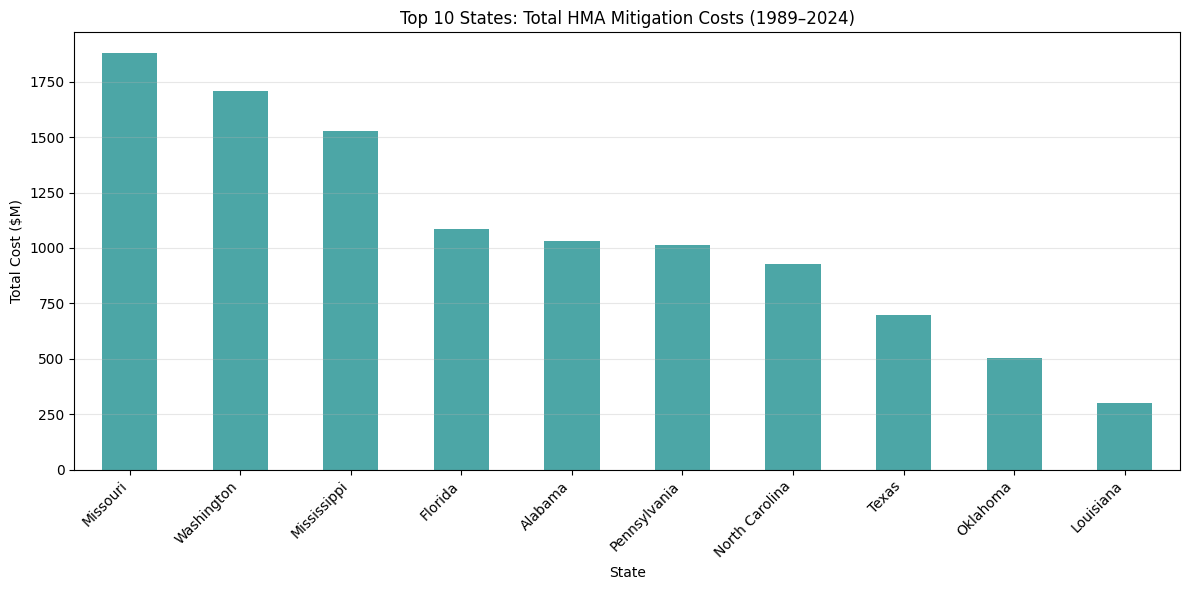

In [ ]:
# 3.1 Top 10 State-Level Distribution (Total Cost by Top 10 States)
print("=== Top 10 State-Level Distribution ===")

# Compute Stats
state_stats = df.groupby('state').agg({
    'totalMitigationCost': ['count', 'sum', 'mean']
}).round(2)
state_stats.columns = ['Projects', 'Total_Cost', 'Avg_Cost']
state_stats['Projects'] = state_stats['Projects'].astype(int)
state_stats['Total_Cost_M'] = state_stats['Total_Cost'] / 1e6  # $M
state_stats['Avg_Cost_K'] = state_stats['Avg_Cost'] / 1000  # $K
state_stats['National_Share_%'] = (state_stats['Total_Cost'] / state_stats['Total_Cost'].sum()) * 100
state_stats = state_stats.sort_values('Total_Cost_M', ascending=False)

# Top 10 Table 
top_10 = state_stats.head(10).copy()
top_10 = top_10[['Projects', 'Total_Cost_M', 'National_Share_%', 'Avg_Cost_K']]
print("\nTop 10 States by Total Cost ($M):")
print(top_10.to_string(float_format='%.1f'))

# Bar Plot: Total Cost (Top 10)
plt.figure(figsize=(12, 6))
top_10['Total_Cost_M'].plot(kind='bar', color='teal', alpha=0.7)
plt.title('Top 10 States: Total HMA Mitigation Costs (1989–2024)')
plt.xlabel('State')
plt.ylabel('Total Cost ($M)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{data_folder}/top10_states_bar.png", dpi=300, bbox_inches='tight')
plt.show()

=== Hazard Type Distribution (Full Available Categories) ===

Hazard Types by Total Cost ($M) - All Categories:
                Projects  Total_Cost_M  National_Share_%  Avg_Cost_K
damageCategory                                                      
Unknown            25061   6275.537661         50.154969   250.41050
50 - 99%           10150   3627.094119         28.988240   357.34917
0 - 49%             5967   2542.459943         20.319693   426.08680
100%                 860     67.203217          0.537097    78.14328


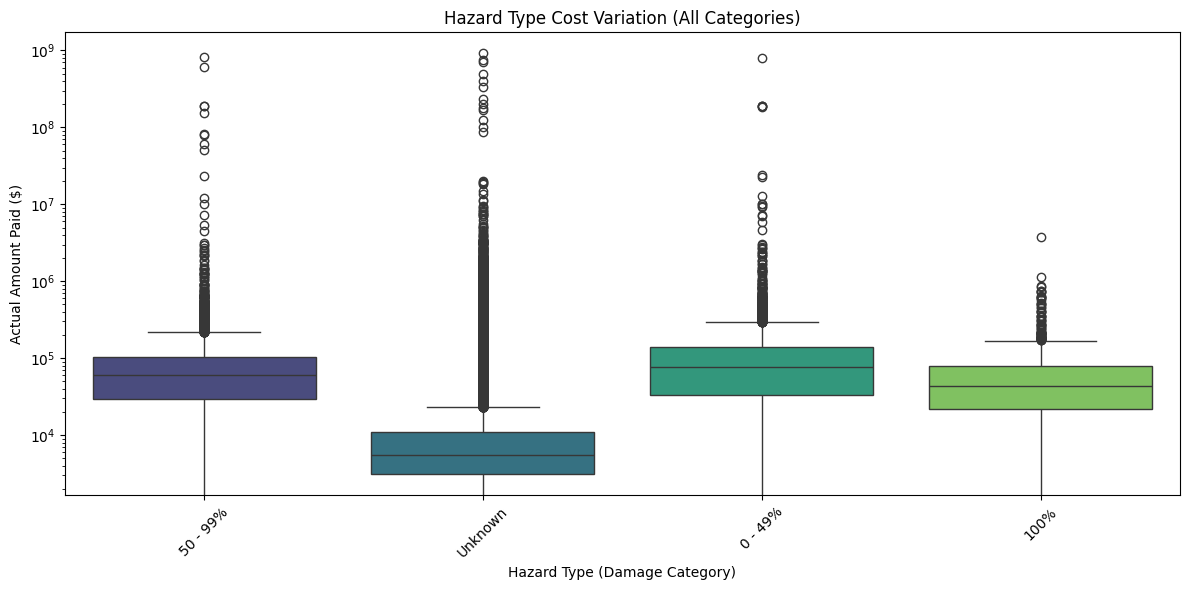

In [22]:
# 2. Hazard Type Distribution
print("=== Hazard Type Distribution (Full Available Categories) ===")

if 'damageCategory' in df.columns:
    hazard_stats = df.groupby('damageCategory').agg({
        'totalMitigationCost': ['count', 'sum', 'mean']
    }).round(2)
    hazard_stats.columns = ['Projects', 'Total_Cost', 'Avg_Cost']
    hazard_stats['Projects'] = hazard_stats['Projects'].astype(int)
    hazard_stats['Total_Cost_M'] = hazard_stats['Total_Cost'] / 1e6  # $M
    hazard_stats['Avg_Cost_K'] = hazard_stats['Avg_Cost'] / 1000  # $K
    hazard_stats['National_Share_%'] = (hazard_stats['Total_Cost'] / hazard_stats['Total_Cost'].sum()) * 100
    hazard_stats = hazard_stats.sort_values('Total_Cost_M', ascending=False)

    # Full Table (All Categories, since <10)
    print("\nHazard Types by Total Cost ($M) - All Categories:")
    print(hazard_stats[['Projects', 'Total_Cost_M', 'National_Share_%', 'Avg_Cost_K']])

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='damageCategory', y='actualAmountPaid', palette='viridis')
    plt.title('Hazard Type Cost Variation (All Categories)')
    plt.xlabel('Hazard Type (Damage Category)')
    plt.ylabel('Actual Amount Paid ($)')
    plt.xticks(rotation=45)
    plt.yscale('log')  # Log scale for skew
    plt.tight_layout()
    plt.savefig(f"{data_folder}/hazard_distribution_boxplot.png", dpi=300, bbox_inches='tight')
    plt.show()

=== Relationship: Project Cost vs. Property Type & Hazard Category ===

Avg Project Cost ($K) by Property Type & Hazard Category:
damageCategory                            0 - 49%      100%  50 - 99%  \
structureType                                                           
2-4 Family                                208.028    55.632   162.035   
Manufactured Home                          37.471    43.509   148.996   
Multi-Family Dwelling - 5 Or More Units    91.073  2138.129   147.320   
Non-Residential - Private                2625.949   322.217   172.523   
Non-Residential - Public                  342.447   255.333   499.326   
Other (Specify In Comments)               236.194    59.149   147.668   
Single Family                             394.395    76.203   345.269   
Unknown                                     0.000     0.000     0.000   
Vacant Land                                20.070    79.051    28.307   

damageCategory                            Unknown  
structureType 

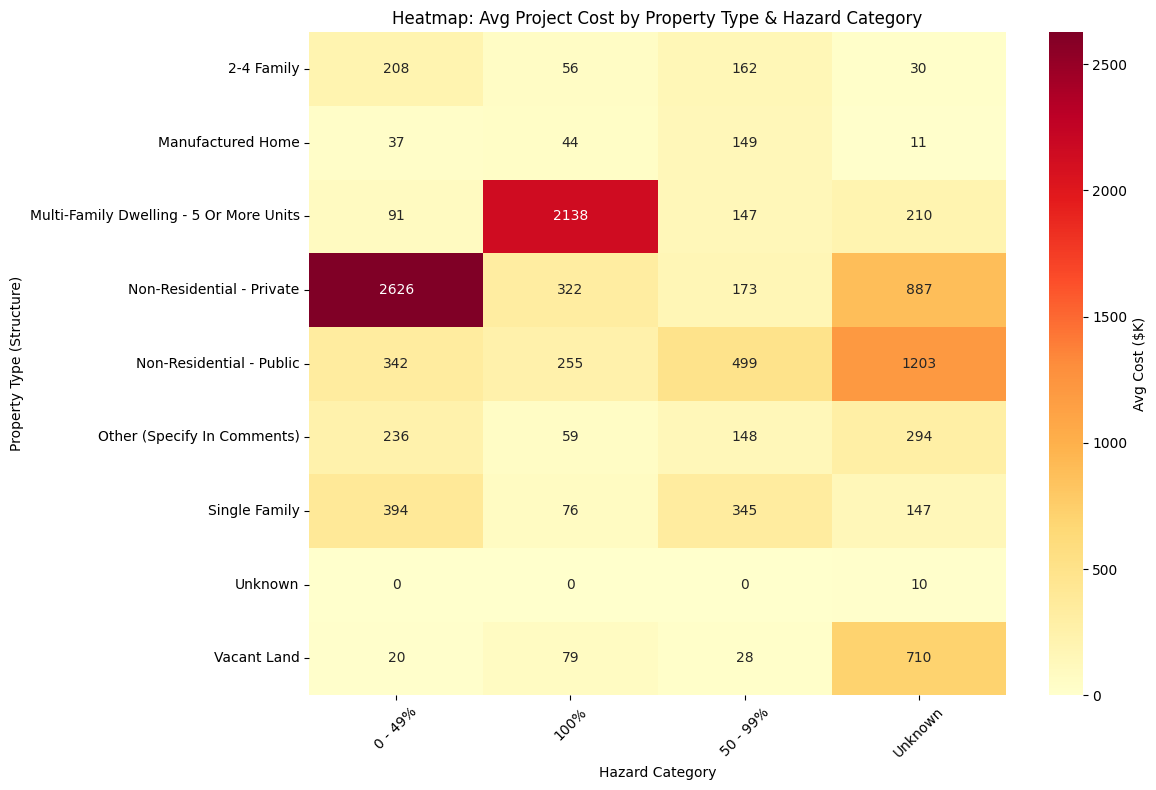

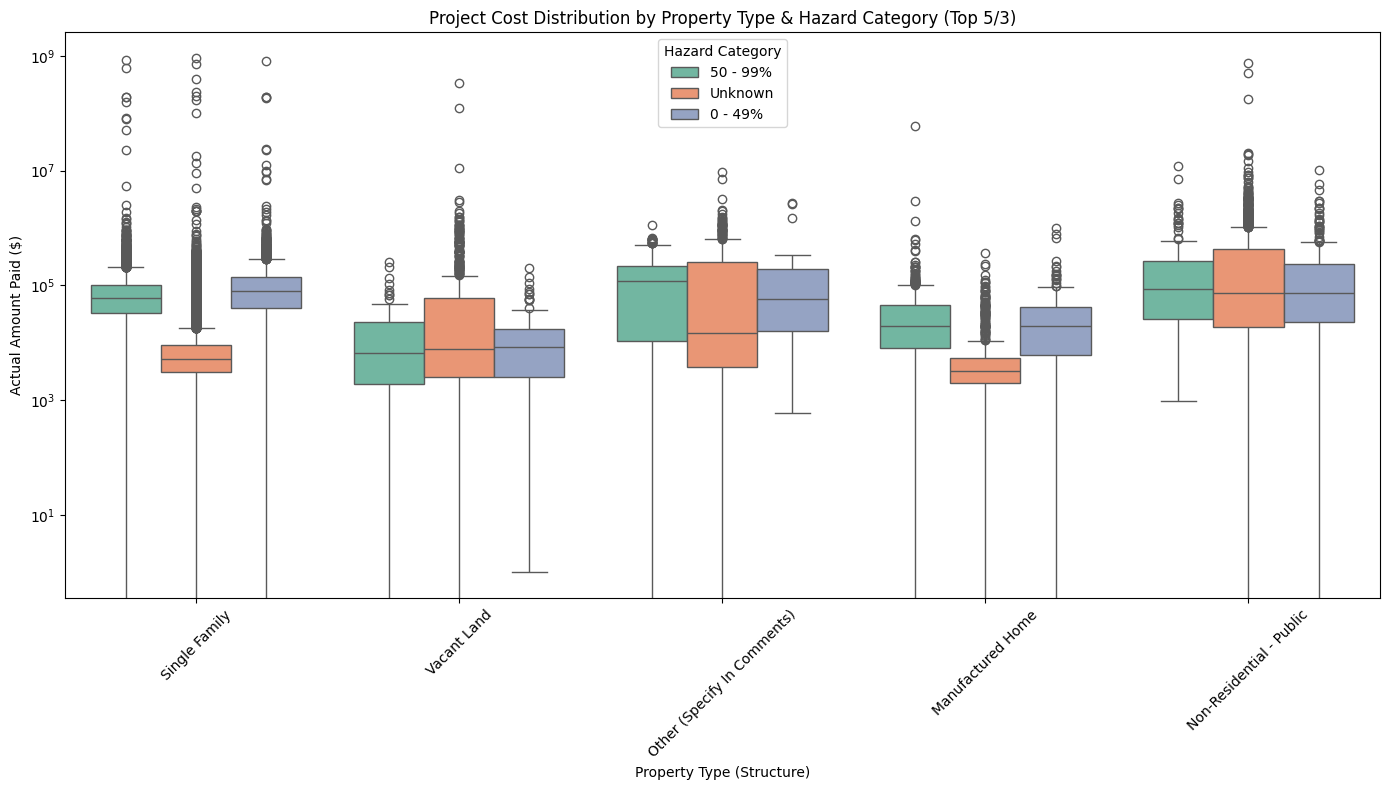

In [24]:
#Cell: Relationship Between Project Cost, Property Type, and Hazard Category
# Explores bivariate/multivariate links: Avg cost by structureType & damageCategory.
# Visuals: Heatmap (avg cost cross-tab), boxplots. For Section 3.3 Multivariate.

print("=== Relationship: Project Cost vs. Property Type & Hazard Category ===")

# Assume df loaded; check columns
if 'structureType' in df.columns and 'damageCategory' in df.columns:
    # Cross-tab: Avg Cost by Property Type & Hazard Category
    cross_tab = df.groupby(['structureType', 'damageCategory'])['actualAmountPaid'].mean().unstack(fill_value=0).round(0)
    print("\nAvg Project Cost ($K) by Property Type & Hazard Category:")
    print(cross_tab / 1000)  # $K

    # Heatmap: Avg Cost Matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cross_tab / 1000, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Avg Cost ($K)'})
    plt.title('Heatmap: Avg Project Cost by Property Type & Hazard Category')
    plt.xlabel('Hazard Category')
    plt.ylabel('Property Type (Structure)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{data_folder}/cost_property_hazard_heatmap.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Boxplot: Cost by Property Type (Faceted by Hazard Category)
    top_types = df['structureType'].value_counts().head(5).index  # Top 5 types for readability
    top_hazards = df['damageCategory'].value_counts().head(3).index  # Top 3 hazards
    df_filtered = df[df['structureType'].isin(top_types) & df['damageCategory'].isin(top_hazards)]
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df_filtered, x='structureType', y='actualAmountPaid', hue='damageCategory', palette='Set2')
    plt.title('Project Cost Distribution by Property Type & Hazard Category (Top 5/3)')
    plt.xlabel('Property Type (Structure)')
    plt.ylabel('Actual Amount Paid ($)')
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.legend(title='Hazard Category')
    plt.tight_layout()
    plt.savefig(f"{data_folder}/cost_property_hazard_boxplot.png", dpi=300, bbox_inches='tight')
    plt.show()